Эпоха   0: w = 3.9749, b = 4.5372, loss = 40.837363, lr = 0.100000
Эпоха  20: w = -1.3092, b = 2.1258, loss = 0.307044, lr = 0.083333
Эпоха  40: w = -1.5511, b = 2.0133, loss = 0.221415, lr = 0.071429
Эпоха  60: w = -1.5693, b = 2.0048, loss = 0.220914, lr = 0.062500
Эпоха  80: w = -1.5713, b = 2.0039, loss = 0.220908, lr = 0.055556

Финальные параметры: w = -1.5716, b = 2.0037
Финальный loss: 0.220908
Истинные параметры: w = -1.5000, b = 2.0000


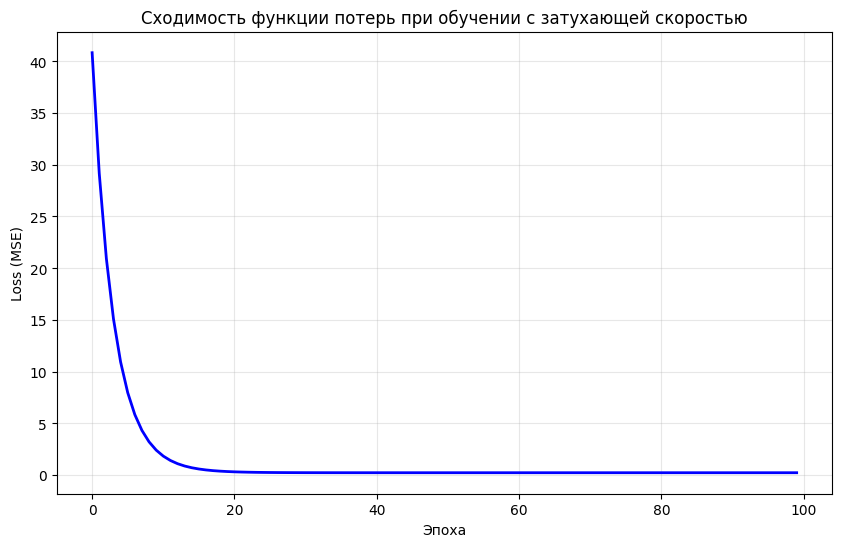

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Генерируем синтетические данные
np.random.seed(42)
x = np.random.randn(100, 1)
true_w, true_b = -1.5, 2
y = true_w * x + true_b + np.random.randn(100, 1) * 0.5

# 2. Инициализация параметров
w, b = 5.0, 5.0
lr0 = 0.1
decay_rate = 0.01
epochs = 100

losses = []
w_history, b_history = [], []

# 3. Обучение с затухающей скоростью обучения
for epoch in range(epochs):

    y_pred = w * x + b
    
    loss = np.mean((y_pred - y) ** 2)
    losses.append(loss)
    w_history.append(w)
    b_history.append(b)
    
    grad_w = np.mean(2 * (y_pred - y) * x)
    grad_b = np.mean(2 * (y_pred - y))
    
    lr = lr0 / (1 + decay_rate * epoch)
    
    w -= lr * grad_w
    b -= lr * grad_b
    
    if epoch % 20 == 0:
        print(f"Эпоха {epoch:3d}: w = {w:.4f}, b = {b:.4f}, loss = {loss:.6f}, lr = {lr:.6f}")

# 4. Финальные результаты
print(f"\nФинальные параметры: w = {w:.4f}, b = {b:.4f}")
print(f"Финальный loss: {losses[-1]:.6f}")
print(f"Истинные параметры: w = {true_w:.4f}, b = {true_b:.4f}")

# 5 график сходимости
plt.figure(figsize=(10, 6))
plt.plot(losses, 'b-', linewidth=2)
plt.xlabel('Эпоха')
plt.ylabel('Loss (MSE)')
plt.title('Сходимость функции потерь при обучении с затухающей скоростью')
plt.grid(True, alpha=0.3)
plt.show()